## OLS估计

In [26]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

np.random.seed(9876789)

#生成实验数据
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

#ols模型需要的X矩阵需要加入常数项
X = sm.add_constant(X)
y = np.dot(X, beta)+e

#OLS拟合实验数据
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Thu, 19 Dec 2019   Prob (F-statistic):          2.83e-239
Time:                        17:33:16   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [17]:
#OLS模型中含有的属性和方法
print(dir(results))

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_robustcov_results', '_is_nested', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params'

In [18]:
#这里只看看系数和R2
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 1.1875799   0.06751355 10.00087227]
R2:  0.9999904584846492


## OLS非线性曲线，但参数是线性的

In [37]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     267.0
Date:                Thu, 19 Dec 2019   Prob (F-statistic):           4.28e-29
Time:                        17:39:35   Log-Likelihood:                -29.585
No. Observations:                  50   AIC:                             67.17
Df Residuals:                      46   BIC:                             74.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5031      0.024     20.996      0.0

In [38]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.50314123  0.58047691 -0.02084597  5.02303139]
Standard errors:  [0.02396328 0.09420248 0.00210399 0.15537883]
Predicted values:  [ 4.50188223  5.01926399  5.49184506  5.88798995  6.18748025  6.38483648
  6.49021831  6.52775537  6.53158285  6.54023313  6.59030507  6.7104509
  6.91666871  7.20967408  7.57478245  7.98432176  8.40217892  8.78973307
  9.11220088  9.34435135  9.47465119  9.50715972  9.46086192  9.36654926
  9.26176075  9.18461538  9.16754929  9.23198657  9.3848194   9.61727563
  9.90636005 10.21863244 10.51570167 10.7605333  10.92353419 10.98741461
 10.95002886 10.82472782 10.63816544 10.42591956 10.22664657 10.0757303
  9.99946853 10.01075234 10.10694816 10.27033045 10.47099394 10.67176702
 10.83431887 10.92545718]


为了对比 真实值与OLS预测值，使用``wls_prediction_std``



```python
from statsmodels.sandbox.regression.predstd import wls_prediction_std
```

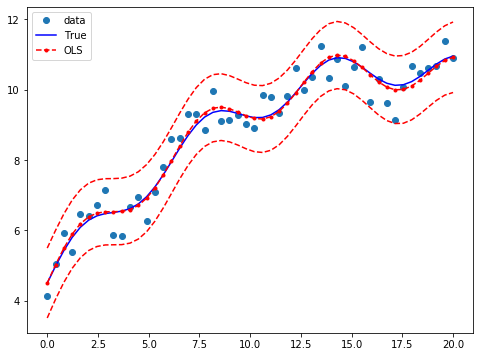

In [50]:
#标准差预测值， 置信区间下界限， 置信区间上界限
prstd, iv_l, iv_u = wls_prediction_std(res)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.predict(), 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

## 虚拟变量处理
dummy = sm.categorical(groups, drop=True)

In [79]:
import numpy as np
import statsmodels.api as sm

groups = np.array(['a', 'b', 'a', 'a', 'c'])
sm.categorical(groups)

array([['a', '1.0', '0.0', '0.0'],
       ['b', '0.0', '1.0', '0.0'],
       ['a', '1.0', '0.0', '0.0'],
       ['a', '1.0', '0.0', '0.0'],
       ['c', '0.0', '0.0', '1.0']], dtype='<U32')

In [80]:
sm.categorical(groups, drop=True)

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [85]:
x = np.array([1, 2, 3, 4, 5])
dummy = sm.categorical(groups, drop=True)
np.column_stack((x, dummy))

array([[1., 1., 0., 0.],
       [2., 0., 1., 0.],
       [3., 1., 0., 0.],
       [4., 1., 0., 0.],
       [5., 0., 0., 1.]])

### 共线性问题
数据集Longley是众所周知的拥有强共线性现象的数据集，也就是自变量之间拥有较高的相关性。

因变量TOTEMP

自变量
- GNPDEFL
- GNP
- UNEMP
- ARMED
- POP
- YEAR

共线性问题会影响ols参数估计的稳定性。

In [89]:
import pandas as pd
df = pd.read_csv('data/longley.csv')
df.head()

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,61122.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,60171.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,61187.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,63221.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


In [4]:
import statsmodels.api as sm
import pandas as pd

df = pd.read_csv('data/longley.csv')
X = df[df.columns[1:]]
X = sm.add_constant(X)
y = df[df.columns[0]]

ols = sm.OLS(y, X)
ols_results = ols.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Thu, 19 Dec 2019   Prob (F-statistic):           4.98e-10
Time:                        19:52:43   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


summary末尾Warnings提醒我们模型的**condition number**很大，可能存在很强的**多重共线性问题**或者其他问题

## Condition number
condition number可以用来评估多重共线性问题的大小。

当该值大于20， 基本可以确定是存在多重共线性问题(参考Greene 4.9)

In [6]:
import numpy as np
np.linalg.cond(ols.exog)

4859257015.454868

## 删除观测值
Greene也指出即使移除一个观测值，也可能会对ols估计产生巨大的影响

In [134]:
#保留了前14个观测值
ols_results2 = sm.OLS(y[:14], X[:14]).fit()

print("Percentage change %4.2f%%\n"*7 % tuple([i for i in (ols_results2.params - ols_results.params)/ols_results.params*100]))

Percentage change 4.55%
Percentage change -105.20%
Percentage change -3.43%
Percentage change 2.92%
Percentage change 3.32%
Percentage change 97.06%
Percentage change 4.64%



我们也可以查看DFBETAS，即当移除某个观测值后，每个参数的会因此发生的改变(标准化)

We can also look at formal statistics for this such as the DFBETAS – a standardized measure of how much each coefficient changes when that observation is left out.

In [139]:
influence = ols_results.get_influence()
influence.summary_frame()

,dfb_const,dfb_GNPDEFL,dfb_GNP,dfb_UNEMP,dfb_ARMED,dfb_POP,dfb_YEAR,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.016406,-0.234566,-0.045095,-0.121513,-0.149026,0.211057,0.013388,0.140840,1.156014,0.424537,0.992915,1.181112,1.014472
1,-0.020608,-0.289091,0.124453,0.156964,0.287700,-0.161890,0.025958,0.040561,-0.467568,0.564978,-0.532850,-0.446281,-0.508591
2,-0.008382,0.007161,-0.016799,0.009575,0.002227,0.014871,0.008103,0.002930,0.190101,0.362075,0.143218,0.179590,0.135299
3,0.018093,0.907968,-0.500022,-0.495996,0.089996,0.711142,-0.040056,0.244193,-1.697900,0.372228,-1.307421,-1.941705,-1.495156
4,1.871260,-0.219351,1.611418,1.561520,1.169337,-1.081513,-1.864186,0.613917,1.638429,0.615511,2.073021,1.844027,2.333153
5,-0.321373,-0.077045,-0.198129,-0.192961,-0.430626,0.079916,0.323275,0.088845,-1.029989,0.369574,-0.788617,-1.033931,-0.791634
6,0.315945,-0.241983,0.438146,0.471797,-0.019546,-0.448515,-0.307517,0.078648,-0.754657,0.491532,-0.741982,-0.735136,-0.722789
7,0.015816,-0.002742,0.018591,0.005064,-0.031320,-0.015823,-0.015583,0.000549,-0.061430,0.504656,-0.062005,-0.057929,-0.058471
8,-0.004019,-0.045687,0.023708,0.018125,0.013683,-0.034770,0.005116,0.000488,0.063685,0.457117,0.058438,0.060056,0.055108
9,-1.018242,-0.282131,-0.412621,-0.663904,-0.715020,-0.229501,1.035723,0.235214,1.825818,0.330615,1.283160,2.169448,1.524659


大致上，我们可以认为DBETAS的绝对值大于 $\frac{2}{\sqrt N}$

In [137]:
2./(len(X)**.5)

0.5

In [142]:
# 保留含有dfb的字段名
influence.summary_frame().filter(regex="dfb")

,dfb_const,dfb_GNPDEFL,dfb_GNP,dfb_UNEMP,dfb_ARMED,dfb_POP,dfb_YEAR
0,-0.016406,-0.234566,-0.045095,-0.121513,-0.149026,0.211057,0.013388
1,-0.020608,-0.289091,0.124453,0.156964,0.287700,-0.161890,0.025958
2,-0.008382,0.007161,-0.016799,0.009575,0.002227,0.014871,0.008103
3,0.018093,0.907968,-0.500022,-0.495996,0.089996,0.711142,-0.040056
4,1.871260,-0.219351,1.611418,1.561520,1.169337,-1.081513,-1.864186
5,-0.321373,-0.077045,-0.198129,-0.192961,-0.430626,0.079916,0.323275
6,0.315945,-0.241983,0.438146,0.471797,-0.019546,-0.448515,-0.307517
7,0.015816,-0.002742,0.018591,0.005064,-0.031320,-0.015823,-0.015583
8,-0.004019,-0.045687,0.023708,0.018125,0.013683,-0.034770,0.005116
9,-1.018242,-0.282131,-0.412621,-0.663904,-0.715020,-0.229501,1.035723


现在statsmodels正在持续开发中，未来python的计量分析方面的应用会越来越好用，期待ing